In [2]:
import sys

In [1]:
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install ipympl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import random

from enum import Enum

In [4]:


def drawLine(screenWidth, screenHeight, lineStart, lineEnd):

    def integerPart(x):
        return math.floor(x)

    def fractionPart(x):
        return x - math.floor(x)

    def drawPixel(x, y, brightness):
        if(x < screen.shape[1] and y < screen.shape[0]):
            screen[y, x] = brightness

    x1, y1 = lineStart
    x2, y2 = lineEnd

    # Init empty screen
    screen = np.zeros((screenHeight, screenWidth))

    # python will assign any number divided by float('inf') to zero (happy accident)
    slope = float('inf') if x1 == x2 else (y2-y1)/(x2-x1)
    if(abs(slope) > 1):

        slope = 1/slope
        for y in range(min(y1, y2), max(y1, y2)+1):
            x = slope*(y-y1) + x1
            drawPixel(integerPart(x), y, 1-fractionPart(x))
            drawPixel(integerPart(x)+1, y, fractionPart(x))
    else:
        for x in range(min(x1, x2), max(x1, x2)+1):
            y = slope*(x-x1) + y1
            drawPixel(x, integerPart(y), 1-fractionPart(y))
            drawPixel(x, integerPart(y)+1, fractionPart(y))

    return plt.matshow(screen)


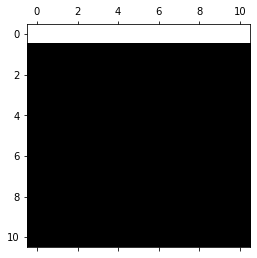

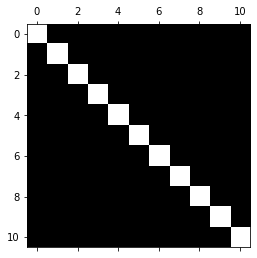

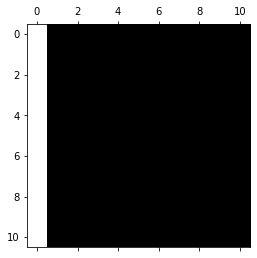

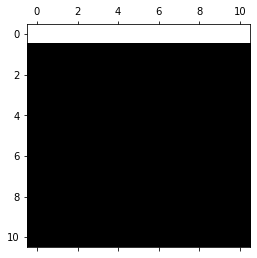

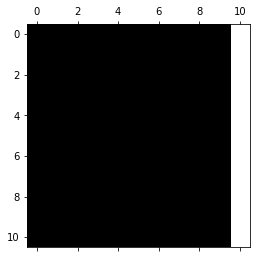

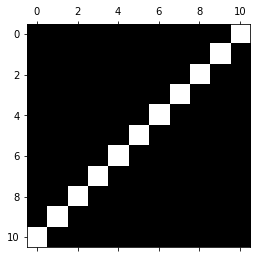

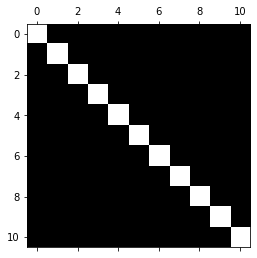

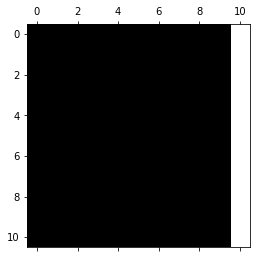

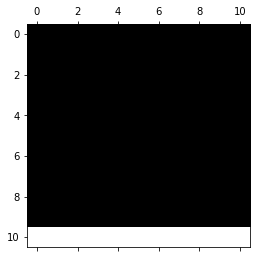

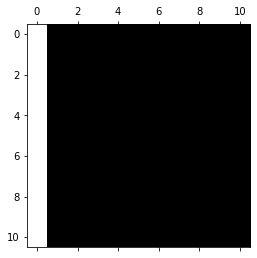

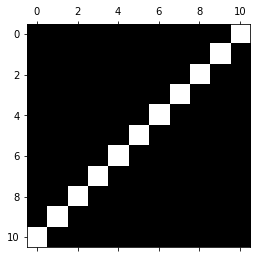

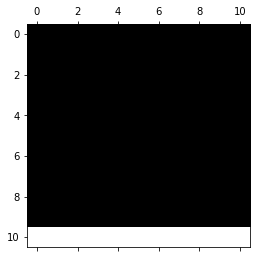

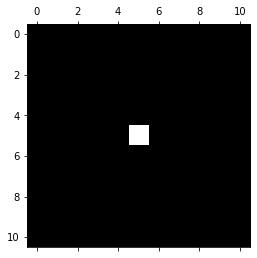

In [6]:

screenWidth = 11
screenHeight = 11


class Points(Enum):
  topLeft = (0,0)
  topRight = (screenWidth-1,0)
  bottomRight = (screenWidth-1,screenHeight-1)
  bottomLeft = (0, screenHeight-1)

# Draw a point from every corner to every other corner
for point1 in Points:
  for point2 in Points:
    if point1 != point2:
      drawLine(screenWidth, screenHeight, point1.value, point2.value)
  
# Draw a line from a point to itself

drawLine(screenWidth, screenHeight, (5,5),(5,5))






plt.gray()
plt.show()


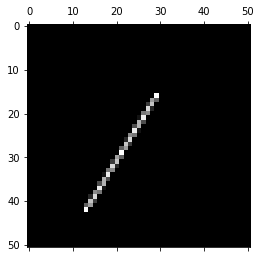

In [26]:
screenWidth = 51
screenHeight = 51
drawLine(screenWidth, screenHeight, (random.randint(0, screenWidth-1), random.randint(0,
         screenHeight-1)), (random.randint(0, screenWidth-1), random.randint(0, screenHeight-1)))

plt.show()
